### Notebook written by: Arnau Vancells Lujan
#### 04/10/2018

### Useful functions definition

In [1]:
%matplotlib inline
from skimage import io
from skimage import transform
from scipy import misc, ndimage
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

In [2]:
def imshow_4(image1, image2, image3, image4, title1="", title2="", title3="", title4="", cmap=None):
    plt.figure()

    plt.subplot(2, 2, 1)
    imgplot1=plt.imshow(image1,cmap=cmap)
    plt.title(title1)
    plt.colorbar()


    plt.subplot(2, 2, 2)
    imgplot1=plt.imshow(image2,cmap=cmap)
    plt.title(title2)
    plt.colorbar()


    plt.subplot(2, 2, 3)
    imgplot1=plt.imshow(image3,cmap=cmap)
    plt.title(title3)
    plt.colorbar()


    plt.subplot(2, 2, 4)
    imgplot1=plt.imshow(image4,cmap=cmap)
    plt.title(title4)
    plt.colorbar()

    plt.gcf().set_size_inches((16,16))

In [3]:
def imshow_2(image1, image2, title1="", title2="", cmap=None):
    plt.figure()

    plt.subplot(1, 2, 1)
    imgplot1=plt.imshow(image1,cmap=cmap)
    plt.title(title1)
    plt.colorbar()

    plt.subplot(1, 2, 2)    
    imgplot1=plt.imshow(image2,cmap=cmap)
    plt.title(title2)
    plt.colorbar()
    plt.gcf().set_size_inches((16,16))
    

# Hybrid Images

First of all, we load the given image, while also croping the human image to match the cat image size.

In [4]:
#LOAD IMAGES
img1 = io.imread('human.png')
img2 = io.imread('cat.png')

##RESIZE
size1=int(round(img1.shape[0]*(4/3.)));
size2=int(round(img1.shape[1]*(4/3.)));

img1 = transform.resize(img1,(size1, size2));

#CROP
left = 50
top = 50
right = 51+img2.shape[0]-1
bottom = 51+img2.shape[1]-1
img1_c=img1[left: right, top:
bottom]


D:\Program Files (x86)\Anaconda\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


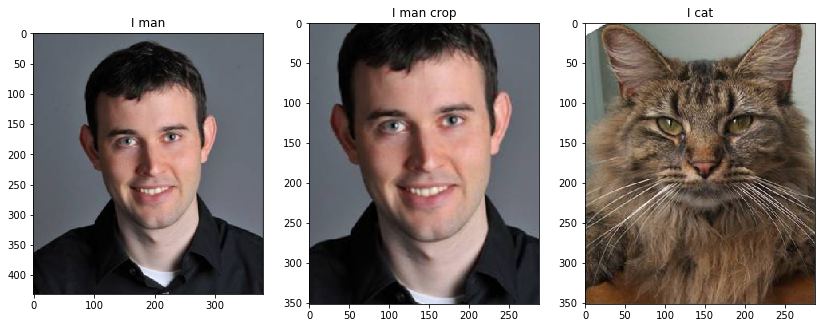

In [5]:
# VISUALIZATION
plt.figure(1)
plt.subplot(131)

imgplot1=plt.imshow(img1,cmap="gray")
plt.title('I man')
plt.subplot(132)
plt.title('I man crop')

imgplot1=plt.imshow(img1_c,cmap="gray")
plt.subplot(133)
plt.title('I cat')

imgplot1=plt.imshow(img2,cmap="gray")
plt.gcf().set_size_inches((14,14))

## Part 1
In order to filter the images, we need to generate a gaussian filter.
The generated filter is using a sigma of 6, as the result looks way better than using the recommended sigma of 9.

1.0

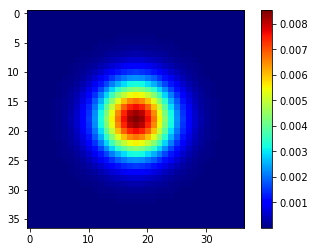

In [6]:
#Gaussian filter
sigma = 6
val = (1/(2*sigma^2)) + (1/(2*sigma^2))
SZ = (6*sigma+1) #6*sigma + 1
[xx,yy]=np.meshgrid(np.linspace(-25,25,SZ),np.linspace(-25,25,SZ))
gaussian = np.exp(-(xx*xx + yy*yy) / (2.*sigma*sigma))
gaussian = gaussian/gaussian.sum()
plt.imshow(gaussian, cmap='jet')
plt.colorbar()
gaussian.sum()

We can convolve the images, using the gaussian filter we've created. The resulting image will contain the low frequencies from the original image.

Using the low frequency image and the original image, we can obtain the high frequency image.

In [7]:
# filter image 1, resulting image has low frequencies
img1_c_low = ndimage.convolve(color.rgb2gray(img1_c), gaussian)
# obtaining high frequencies image from image 1, using low frequencies
img1_c_high = color.rgb2gray(img1_c) - img1_c_low

# filter image 1, resulting image has low frequencies
img2_low = ndimage.convolve(color.rgb2gray(img2), gaussian)
# obtaining high frequencies image from image 1, using low frequencies
img2_high = color.rgb2gray(img2) - img2_low

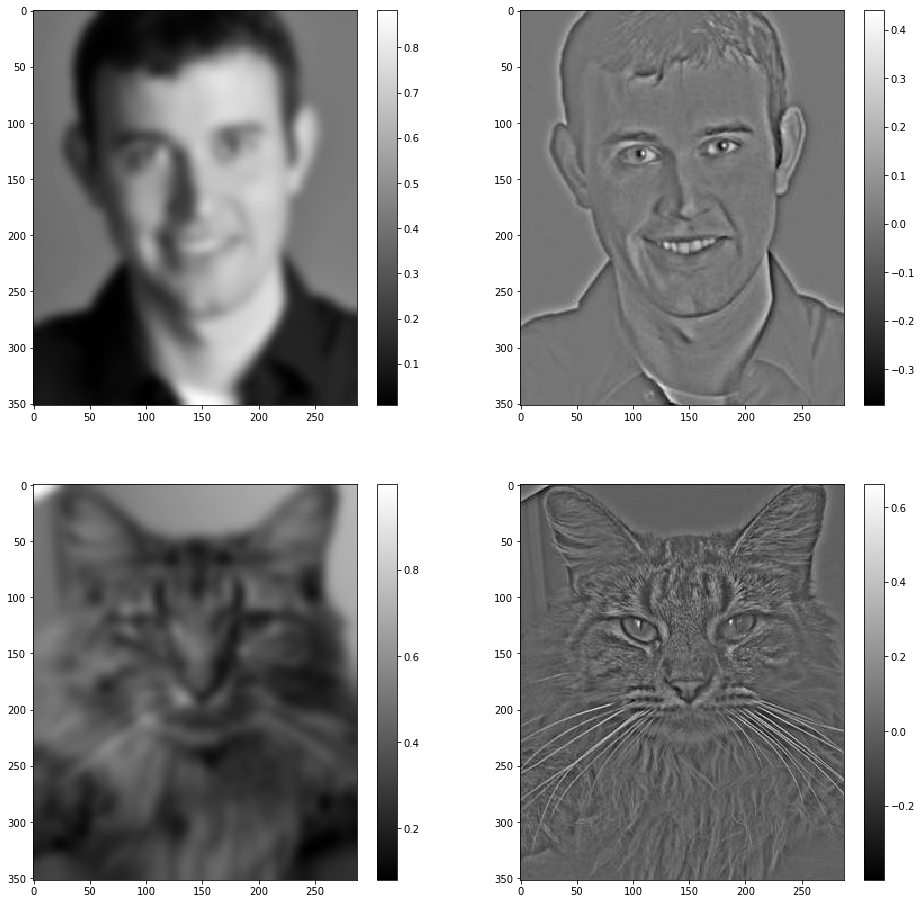

In [8]:
imshow_4(img1_c_low, img1_c_high, img2_low, img2_high, cmap="gray")

To generate a hybrid image we just need to sum and normalize low frequencies from one image with high frequencies from the another.

In [9]:
# We generate the hybrid image by joining Low and High frequencies of each image
# While normalizing the resulting image to scale it correctly
# Using image1's low frequency + image2's high frequency
hybrid_1 = (img1_c_low + img2_high)
hybrid_1 = (hybrid_1 - hybrid_1.min())/(hybrid_1.max() - hybrid_1.min())
# Using image2's low frequency + image1's high frequency
hybrid_2 = (img1_c_high + img2_low)
hybrid_2 = (hybrid_2 - hybrid_2.min())/(hybrid_2.max() - hybrid_2.min())

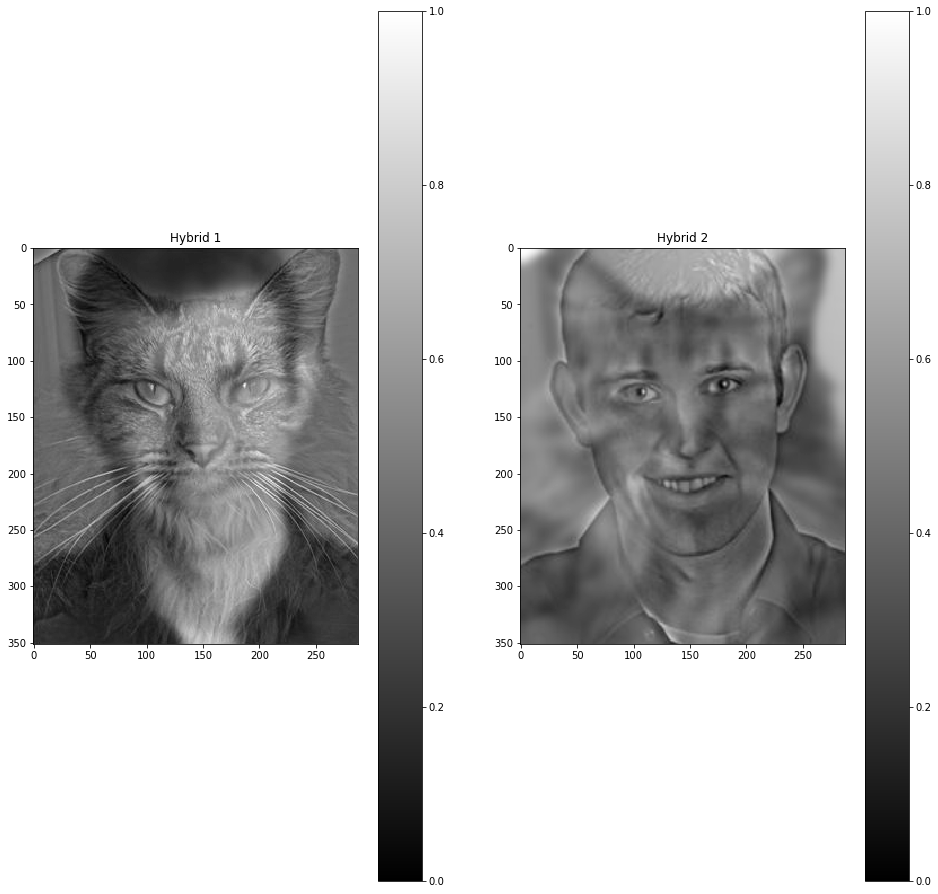

In [10]:
imshow_2(hybrid_1, hybrid_2, "Hybrid 1", "Hybrid 2", cmap="gray")

Now that we've obtained the grayscale hybrid image, we can try and get the RGB hybrid image, but in order to do that in a simple way, we need to separate the 3 color channels, filter them with the gaussian filter separately, joining them afterwards.

In [11]:
# Convolving each channel of the image
img1_r = ndimage.convolve(img1_c[:, :, 0], gaussian)
img1_g = ndimage.convolve(img1_c[:, :, 1], gaussian)
img1_b = ndimage.convolve(img1_c[:, :, 2], gaussian)
# Stacking the convolved channels
img1_rgb_low = np.dstack((img1_r, img1_g, img1_b))
# Obtaining and normalizing the high frequency image
img1_rgb_high = img1_c - img1_rgb_low
img1_rgb_high = (img1_rgb_high - img1_rgb_high.min())/(img1_rgb_high.max() - img1_rgb_high.min())

# Normalizing the image beforehand, as it may cause problems
img2_copy = img2.copy()
img2_copy = (img2_copy - img2_copy.min())/(img2_copy.max() - img2_copy.min())
# Convolving each channel of the image
img2_r = ndimage.convolve(img2_copy[:, :, 0], gaussian)
img2_g = ndimage.convolve(img2_copy[:, :, 1], gaussian)
img2_b = ndimage.convolve(img2_copy[:, :, 2], gaussian)
# Stacking the convolved channels
img2_rgb_low = np.dstack((img2_r, img2_g, img2_b))
# Obtaining and normalizing the high frequency image
img2_rgb_high = img2_copy - img2_rgb_low
img2_rgb_high = (img2_rgb_high - img2_rgb_high.min())/(img2_rgb_high.max() - img2_rgb_high.min())

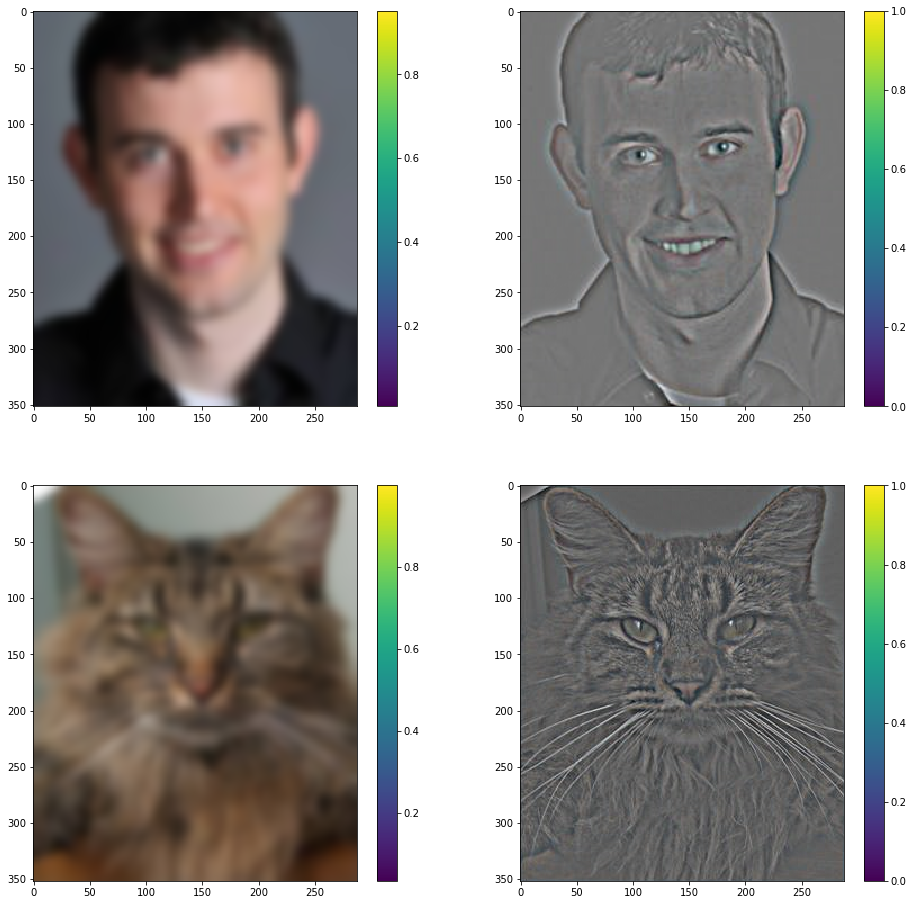

In [12]:
imshow_4(img1_rgb_low, img1_rgb_high, img2_rgb_low, img2_rgb_high)

In [13]:
# We generate the hybrid image by joining Low and High frequencies of each image
# While normalizing the resulting image to scale it correctly
# Using image1's low frequency + image2's high frequency
hybrid_rgb_1 = (img1_rgb_low + img2_rgb_high)
hybrid_rgb_1 = (hybrid_rgb_1 - hybrid_rgb_1.min())/(hybrid_rgb_1.max() - hybrid_rgb_1.min())
# Using image2's low frequency + image1's high frequency
hybrid_rgb_2 = (img1_rgb_high + img2_rgb_low)
hybrid_rgb_2 = (hybrid_rgb_2 - hybrid_rgb_2.min())/(hybrid_rgb_2.max() - hybrid_rgb_2.min())

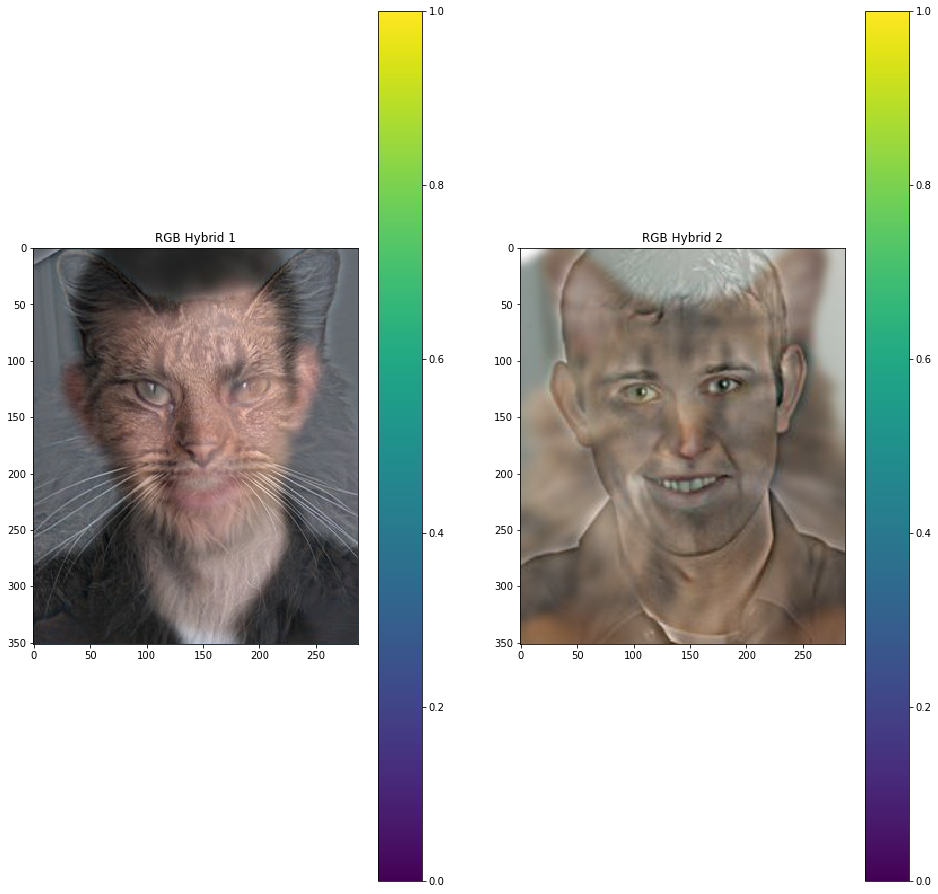

In [14]:
imshow_2(hybrid_rgb_1, hybrid_rgb_2, "RGB Hybrid 1", "RGB Hybrid 2")

## Part 2
In this second part of the Notebook, we will be generating the same images as we did in the part 1, but using Fourier Transform instead.

fft size is determined by the original images sizes. We are taking the value of 512 as its the closest power of 2 value.

We use the function fftshift, to transform the gaussian filter to the frequency domain.

Now we just need to transform the image that we want to filter, to the frequency domain.

Having both the filter and the image on the frequency domain, we just need to apply a simple multiplication operation and transform back, out of the frequency domain, to obtain the filtered image.

In [36]:
def fft_filter(image, filt, SZ, fftsize=512):
    # applying fft2 to the filter using fftsize
    fil_fft = fftpack.fft2(filt, (fftsize, fftsize)) 
    # shifting the filter to the frequency domain using np.log(1+np.abs(filter))
    fft_gaussian = fftpack.fftshift(np.log(1+np.abs(fil_fft)))
    
    
    # applying fft2 to the image using fftsize
    img_exp = fftpack.fft2(color.rgb2gray(image), (fftsize, fftsize)) 
    # shifting the image to the frequency domain using np.log(1+np.abs(image))
    img_fft = fftpack.fftshift(np.log(1+np.abs(img_exp)))
    
    # multiplying both image and filter on the frequency domain, to obtain the filtered image in the freq. domain
    img_fil_fft = img_exp * fil_fft
    # inverse shifting the image
    img_fil = fftpack.ifft2(img_fil_fft)
    # obtaining the recovered image
    img_recovered = np.abs(img_fil)
    # cropping the added borders of the recovered image(because we used fft2)
    hs=int(np.floor(SZ/2.))
    img_final = img_recovered[hs:image.shape[0]+hs, hs:image.shape[1]+hs]
    return img_final
    

1.0

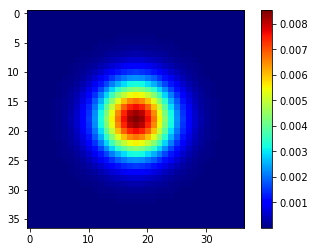

In [37]:
#Gaussian filter
fftsize = 512
sigma = 6
val = (1/(2*sigma^2)) + (1/(2*sigma^2))
SZ = (6*sigma+1) #6*sigma + 1
[xx,yy]=np.meshgrid(np.linspace(-25,25,SZ),np.linspace(-25,25,SZ))
gaussian = np.exp(-(xx*xx + yy*yy) / (2.*sigma*sigma))
gaussian = gaussian/gaussian.sum()
plt.imshow(gaussian, cmap='jet')
plt.colorbar()
gaussian.sum()

In [17]:
# obtaining frequency domain images

# applying fft2 using fftsize
img1_exp = fftpack.fft2(color.rgb2gray(img1_c), (fftsize, fftsize)) 
# shifting image to the frequency domain using np.log(1+np.abs(image))
img1_fft = fftpack.fftshift(np.log(1+np.abs(img1_exp)))


# applying fft2 using fftsize
img2_exp = fftpack.fft2(color.rgb2gray(img2), (fftsize, fftsize)) 
# shifting image to the frequency domain using np.log(1+np.abs(image))
img2_fft = fftpack.fftshift(np.log(1+np.abs(img2_exp)))

 # applying fft2 to the filter using fftsize
fil_fft = fftpack.fft2(gaussian, (fftsize, fftsize)) 
# shifting the filter to the frequency domain using np.log(1+np.abs(filter))
fft_gaussian = fftpack.fftshift(np.log(1+np.abs(fil_fft)))
    

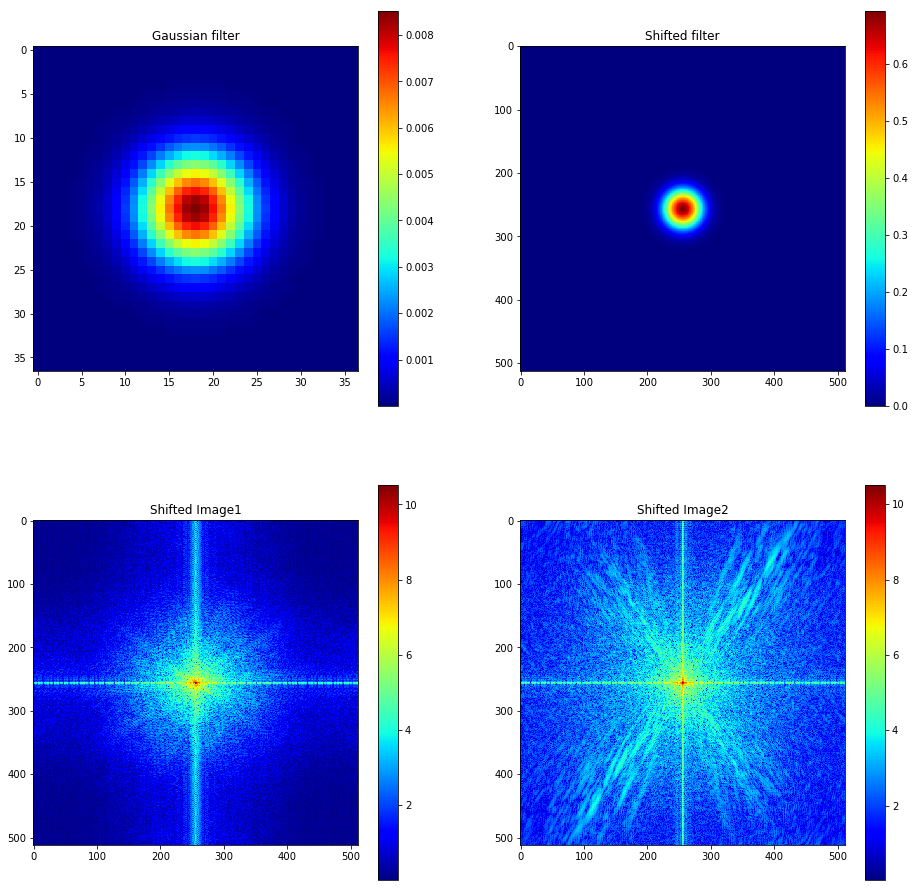

In [18]:
# showing the original and shifted filter, and the shifted images
imshow_4(gaussian, fft_gaussian, img1_fft, img2_fft, title1="Gaussian filter", 
         title2="Shifted filter", title3="Shifted Image1", title4="Shifted Image2", cmap="jet")

In [19]:
# obtaining the filtered images from both img1 and img2
img1_fft_low = fft_filter(img1_c, gaussian, SZ, fftsize)
img2_fft_low = fft_filter(img2, gaussian, SZ, fftsize)

In [20]:
imshow_2(img1_fft_low, img2_fft_low, title1="LF filtered image 1", title2="LF filtered image 2", cmap="gray")

In [21]:
# obtaining HF images using LF
img1_fft_high = color.rgb2gray(img1_c) - img1_fft_low
img2_fft_high = color.rgb2gray(img2) - img2_fft_low

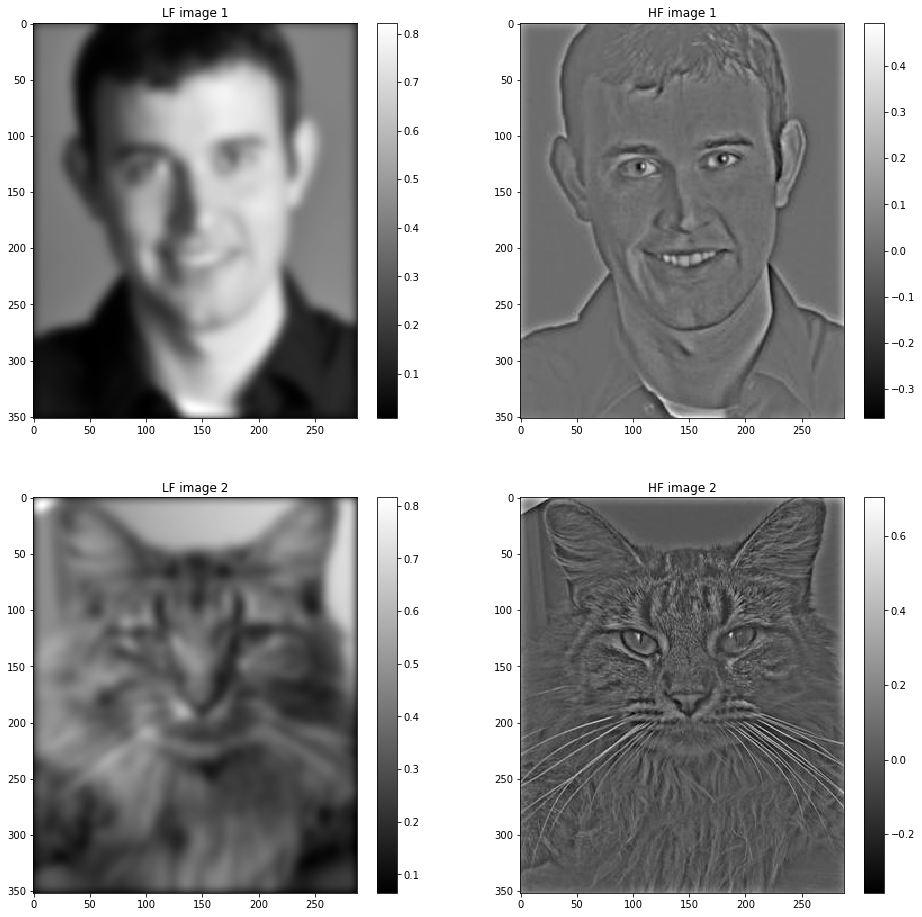

In [22]:
# showing LF and HF images
imshow_4(img1_fft_low, img1_fft_high, img2_fft_low, img2_fft_high, title1="LF image 1", 
         title2="HF image 1", title3="LF image 2", title4="HF image 2", cmap="gray")

In [23]:
# generating the hybrid images
hybrid_1_fft = (img1_fft_low + img2_fft_high)
hybrid_1_fft = (hybrid_1_fft - hybrid_1_fft.min())/(hybrid_1_fft.max() - hybrid_1_fft.min())
hybrid_2_fft = (img1_fft_high + img2_fft_low)
hybrid_2_fft = (hybrid_2_fft - hybrid_2_fft.min())/(hybrid_2_fft.max() - hybrid_2_fft.min())

In [24]:
imshow_2(hybrid_1_fft, hybrid_2_fft, title1="Hybrid 1", title2="Hybrid 2", cmap="gray")

As we've done when convolving the images, we can do the same process on each color channel, obtaining the RGB filtered image.

In [25]:
img1_fft_r =  fft_filter(img1_c[:, :, 0], gaussian, SZ, fftsize)
img1_fft_g = fft_filter(img1_c[:, :, 1], gaussian, SZ, fftsize)
img1_fft_b = fft_filter(img1_c[:, :, 2], gaussian, SZ, fftsize)
img1_fft_rgb_low = np.dstack((img1_fft_r, img1_fft_g, img1_fft_b))
img1_fft_rgb_high = img1_c - img1_fft_rgb_low
img1_fft_rgb_high = (img1_fft_rgb_high - img1_fft_rgb_high.min())/(img1_fft_rgb_high.max() - img1_fft_rgb_high.min())

img2_fft_copy = img2.copy()
img2_fft_copy = (img2_fft_copy - img2_fft_copy.min())/(img2_fft_copy.max() - img2_fft_copy.min())
img2_fft_r = fft_filter(img2_fft_copy[:, :, 0], gaussian, SZ, fftsize)
img2_fft_g = fft_filter(img2_fft_copy[:, :, 1], gaussian, SZ, fftsize)
img2_fft_b = fft_filter(img2_fft_copy[:, :, 2], gaussian, SZ, fftsize)
img2_fft_rgb_low = np.dstack((img2_fft_r, img2_fft_g, img2_fft_b))
img2_fft_rgb_high = img2_fft_copy - img2_fft_rgb_low
img2_fft_rgb_high = (img2_fft_rgb_high - img2_fft_rgb_high.min())/(img2_fft_rgb_high.max() - img2_fft_rgb_high.min())

In [26]:
# showing LF and HF images
imshow_4(img1_fft_rgb_low, img1_fft_rgb_high, img2_fft_rgb_low, img2_fft_rgb_high, title1="LF RGB image 1", 
         title2="HF RGB image 1", title3="LF RGB image 2", title4="HF RGB image 2")

Merging HF and LF images, we can obtain, again, the hybrid images.

In [27]:
hybrid_fft_rgb_1 = (img1_fft_rgb_low + img2_fft_rgb_high)
hybrid_fft_rgb_1 = (hybrid_fft_rgb_1 - hybrid_fft_rgb_1.min())/(hybrid_fft_rgb_1.max() - hybrid_fft_rgb_1.min())

hybrid_fft_rgb_2 = (img1_fft_rgb_high + img2_fft_rgb_low)
hybrid_fft_rgb_2 = (hybrid_fft_rgb_2 - hybrid_fft_rgb_2.min())/(hybrid_fft_rgb_2.max() - hybrid_fft_rgb_2.min())

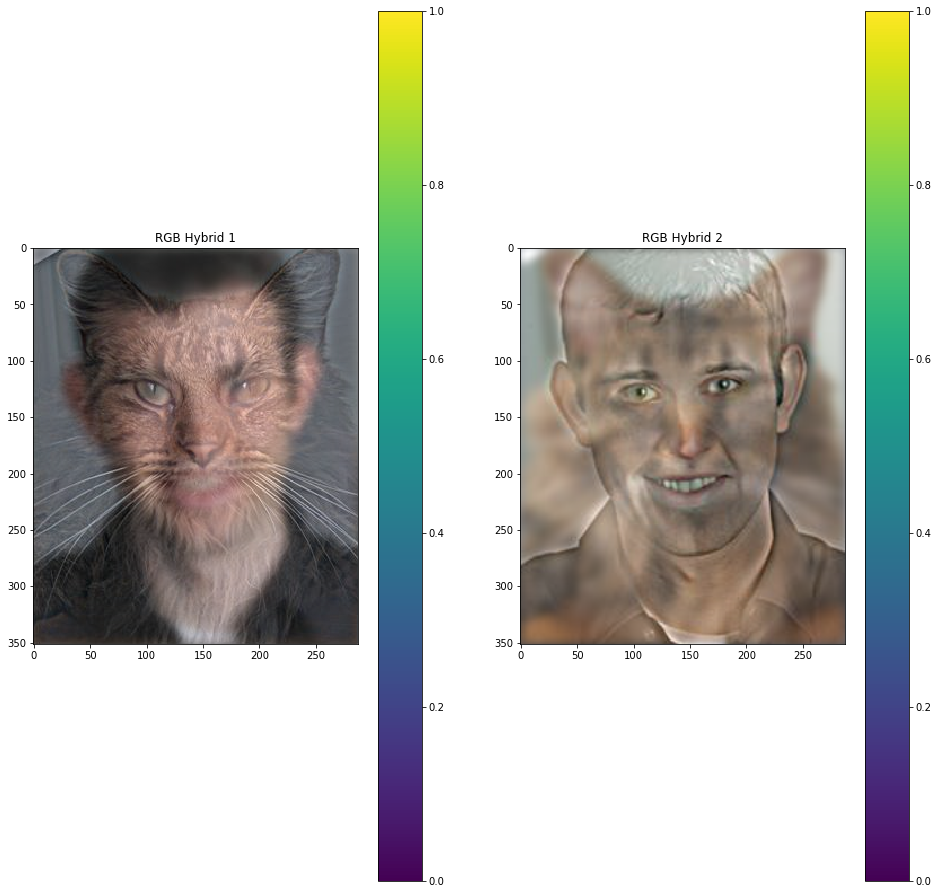

In [28]:
imshow_2(hybrid_fft_rgb_1, hybrid_fft_rgb_2, title1="RGB Hybrid 1", title2="RGB Hybrid 2")

We can obtain the same results, using a HP filter instead of substracting images.

To do this, we just need to generate the inverted gaussian filter, and apply the same process we did before.

In [114]:
#Complementary of a Gaussian filter
SZ_inv = 512
sigma_inv = 0.12
[xx,yy]=np.meshgrid(np.linspace(-4,4,SZ_inv),np.linspace(-4,4,SZ_inv))
gaussian_inv = np.exp(-0.5*(xx*xx+yy*yy)/(sigma_inv*sigma_inv))
fil_inv=1.-fftpack.fftshift(gaussian_inv/np.max(gaussian_inv))
fft_shifted_inv = fftpack.fftshift(fil_inv)

In [115]:
imshow_2(fil_inv, fft_shifted_inv, cmap="jet")

We can define a new function in order to apply the generated inverse gaussian, as we dont need to fit it using fft2, because we are working directly in the fourier domain.

In [130]:
def fft_filter_inv(image, filt, SZ, fftsize=512):
    # applying fft2 to the image using fftsize
    img_exp = fftpack.fft2(color.rgb2gray(image), (fftsize, fftsize))    
    
    # multiplying both image and filter on the frequency domain, to obtain the filtered image in the freq. domain
    img_fil_fft = img_exp * filt    
        
    img_fil = np.real(fftpack.ifft2(img_fil_fft))

    img_crop = img_fil[0:image.shape[0], 0:image.shape[1]] 
    
    return img_crop

Applying both LP and HP filters, we obtain the filtered images, same as we did substracting the LP image.

In [137]:
img1_inv_r_low =  fft_filter(img1_c[:, :, 0], gaussian, SZ, fftsize)
img1_inv_g_low = fft_filter(img1_c[:, :, 1], gaussian, SZ, fftsize)
img1_inv_b_low = fft_filter(img1_c[:, :, 2], gaussian, SZ, fftsize)
img1_inv_rgb_low = np.dstack((img1_inv_r_low, img1_inv_g_low, img1_inv_b_low))

img1_inv_r_high =  fft_filter_inv(img1_c[:, :, 0], fil_inv, SZ_inv)
img1_inv_g_high = fft_filter_inv(img1_c[:, :, 1], fil_inv, SZ_inv)
img1_inv_b_high = fft_filter_inv(img1_c[:, :, 2], fil_inv, SZ_inv)
img1_inv_rgb_high = np.dstack((img1_inv_r_high, img1_inv_g_high, img1_inv_b_high))
# we need to normalize the resulting image
img1_inv_rgb_high = (img1_inv_rgb_high - img1_inv_rgb_high.min())/(img1_inv_rgb_high.max() - img1_inv_rgb_high.min())

In [141]:
img2_inv_r_low =  fft_filter(img2[:, :, 0], gaussian, SZ, fftsize)
img2_inv_g_low = fft_filter(img2[:, :, 1], gaussian, SZ, fftsize)
img2_inv_b_low = fft_filter(img2[:, :, 2], gaussian, SZ, fftsize)
img2_inv_rgb_low = np.dstack((img2_inv_r_low, img2_inv_g_low, img2_inv_b_low))
img2_inv_rgb_low = (img2_inv_rgb_low - img2_inv_rgb_low.min())/(img2_inv_rgb_low.max() - img2_inv_rgb_low.min())

img2_inv_r_high =  fft_filter_inv(img2[:, :, 0], fil_inv, SZ_inv)
img2_inv_g_high = fft_filter_inv(img2[:, :, 1], fil_inv, SZ_inv)
img2_inv_b_high = fft_filter_inv(img2[:, :, 2], fil_inv, SZ_inv)
img2_inv_rgb_high = np.dstack((img2_inv_r_high, img2_inv_g_high, img2_inv_b_high))
# we need to normalize the resulting image
img2_inv_rgb_high = (img2_inv_rgb_high - img2_inv_rgb_high.min())/(img2_inv_rgb_high.max() - img2_inv_rgb_high.min())

In [142]:
# showing LF and HF images, using separated LP and HP filters
imshow_4(img1_inv_rgb_low, img1_inv_rgb_high, img2_inv_rgb_low, img2_inv_rgb_high, title1="LF RGB image 1", 
         title2="HF RGB image 1", title3="LF RGB image 2", title4="HF RGB image 2")

In [143]:
hybrid_inv_rgb_1 = (img1_inv_rgb_low + img2_inv_rgb_high)
hybrid_inv_rgb_1 = (hybrid_inv_rgb_1 - hybrid_inv_rgb_1.min())/(hybrid_inv_rgb_1.max() - hybrid_inv_rgb_1.min())

hybrid_inv_rgb_2 = (img1_inv_rgb_high + img2_inv_rgb_low)
hybrid_inv_rgb_2 = (hybrid_inv_rgb_2 - hybrid_inv_rgb_2.min())/(hybrid_inv_rgb_2.max() - hybrid_inv_rgb_2.min())

In [144]:
imshow_2(hybrid_inv_rgb_1, hybrid_inv_rgb_2, title1="RGB Hybrid 1", title2="RGB Hybrid 2")

*Note:* Second part images are the same as the ones given by the teacher, as I think they look good enough to generate the hybrid images.

## Comparison
In order to compare which of the techniques is better, we can compare the execution times of each one, and compare the resulting image.

So, we will apply the filter on the same image using:
    - The same gaussian filter.
    - The same image(img1_c).

In [33]:
%%time 
# calculating the execution time of this cell
# filter image 1, resulting image has low frequencies
convolve_test = ndimage.convolve(color.rgb2gray(img1_c), gaussian)

Wall time: 171 ms


In [34]:
%%time
# calculating the execution time of this cell
# filter image 1, resulting image has low frequencies
fft_test = fft_filter(img1_c, gaussian, SZ, fftsize)

Wall time: 71 ms


As we can see, there's a huge gap between the 2 methods execution time, being FFT almost a 50% faster than convolving the image.
There's a clear theory on why FFT is faster, as convolving the image implies using a sliding window on each pixel of the image if we are not using stride, but FFT just uses transformations to the frequency domain, which can be applyied directly to the image.

In [35]:
imshow_2(convolve_test, fft_test, title1="Convolve method result", title2="FFT method result", cmap="gray")

The resulting images are, at humans eyes(at least mine), the same. The FFT image may need to be normalized, but in order to mantain the comparation fair, the results are not normalized.

## Conclusion

- Are there changes on the image perception, if we are on grayscale or RGB?
    #### Apparently, no, the resulting images look the same (one B/W and the other with color, obviously). Though, the high frequency image color is not as accurate as the low frequency image, which may vary the aspect of the image a bit(not really significant), this doesn't happen on the grayscale image as it has no color.

To conclude this Notebook, we can say that we've managed to filter images using both methods, convolving and using FFT. 
Both methods have the same outputs, but FFT is way faster. The interesting thing about FFT is that it works perfectly when using gaussian filters, because of gaussian properties (a gaussian is almost the same on Fourier's domain and real domain).

So, we can say that when applying gaussian filters, we can boost the execution times by using FFT, but if we want to apply more complex filters, not based on gaussians, convolving the image is always an option.

